Original shape: (208114, 11)
✅ Improved RMSE: 59638.46


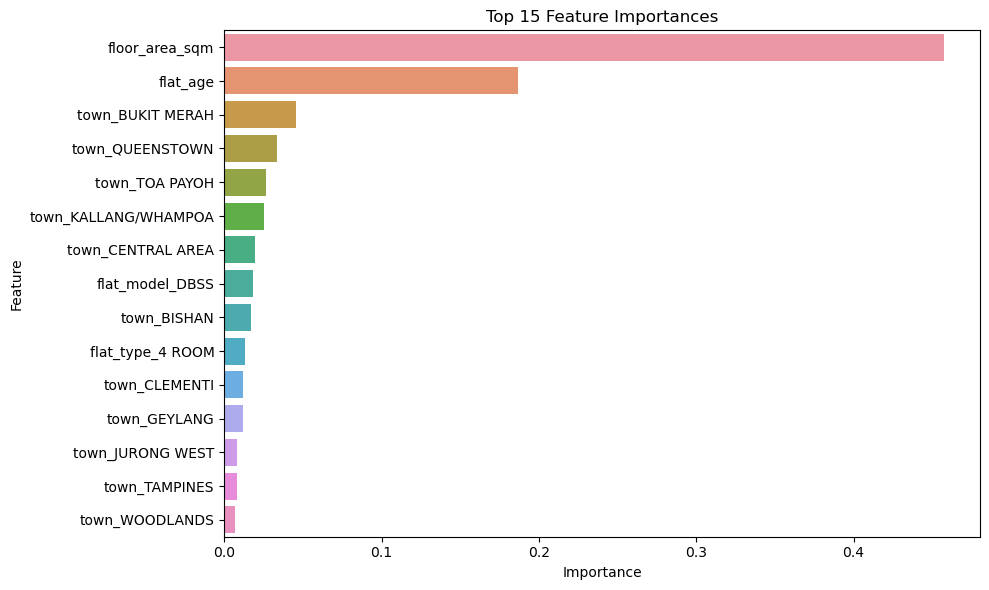

In [14]:
#  1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#  2. Load Dataset
df = pd.read_csv("Resale flat prices based on registration date from Jan-2017 onwards.csv")
print("Original shape:", df.shape)
df.head()

#  3. Basic Cleaning
df.dropna(inplace=True)
df['month'] = pd.to_datetime(df['month'])

#  Feature Engineering: Create new features
df['flat_age'] = df['month'].dt.year - df['lease_commence_date']

#  4. One-Hot Encode Categorical Columns
df_encoded = pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model'], drop_first=True)
df_encoded.drop(columns=['remaining_lease'], inplace=True)

#  5. Define Features and Target
# Remove text columns not used for prediction
X = df_encoded.drop(columns=['resale_price', 'month', 'block', 'street_name', 'storey_range', 'lease_commence_date'])
y = df_encoded['resale_price']

#  6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  7. Train the Model
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)

#  8. Predict & Evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("✅ Improved RMSE:", round(rmse, 2))

#  9. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [2]:
!pip install scikit-learn

In [5]:
from sklearn.metrics import mean_squared_error